In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
conda install geopandas
conda install pycountry
import sys
sys.path
pip install pycountry

In [3]:
#/Users/apple/opt/anaconda3/bin/python -m pip install pycountry
#/Users/yufeng/anaconda3/envs/py33/bin/python -m pip install plotly


In [4]:
import geopandas as gpd
import descartes

In [5]:
df = pd.read_csv("airline.csv")
#print(df.head())
#print("Percentage of N/As in each attribute:")
df.isna().sum()/len(df)
#print("Count of each attribute:")
#print(df.count())

airline_name                     0.000000
link                             0.000000
title                            0.000000
author                           0.000000
author_country                   0.038434
date                             0.000000
content                          0.000000
aircraft                         0.969127
type_traveller                   0.942555
cabin_flown                      0.069475
route                            0.943449
overall_rating                   0.109552
seat_comfort_rating              0.185767
cabin_staff_rating               0.185718
food_beverages_rating            0.196444
inflight_entertainment_rating    0.248381
ground_service_rating            0.946782
wifi_connectivity_rating         0.986351
value_money_rating               0.040415
recommended                      0.000000
dtype: float64

In [6]:
df.describe()
# Dropping irrelavant columns and columns with high proportion of NA values
df = df.drop(['link', 'title', 'author', 'aircraft', 'type_traveller', 'route', 'ground_service_rating'], axis=1)
df.head()

,airline_name,author_country,date,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,NaN,4.0,1
1,adria-airways,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,NaN,5.0,1
2,adria-airways,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,NaN,5.0,1
3,adria-airways,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,NaN,4.0,1
4,adria-airways,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,NaN,2.0,0


In [7]:
'''# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.author_country)
df[["author_country","CODE"]]'''

'# generate country code  based on country name \nimport pycountry \ndef alpha3code(column):\n    CODE=[]\n    for country in column:\n        try:\n            code=pycountry.countries.get(name=country).alpha_3\n           # .alpha_3 means 3-letter country code \n            CODE.append(code)\n        except:\n            CODE.append(\'None\')\n    return CODE\n# create a column for code \ndf[\'CODE\']=alpha3code(df.author_country)\ndf[["author_country","CODE"]]'

In [8]:
df['has_wifi'] = ~df['wifi_connectivity_rating'].isna()
df['has_wifi'] = df['has_wifi'].astype(int)
df['has_entertainment'] = ~df['inflight_entertainment_rating'].isna()
df['has_entertainment'] = df['has_entertainment'].astype(int)

print("Percentage of reviews that feature airlines with WiFi:",df['has_wifi'].value_counts(1).iloc[1]*100,"%")
print("Percentage of reviews that feature airlines with in-flight entertainment:",df['has_entertainment'].value_counts(1).iloc[0]*100,"%")

Percentage of reviews that feature airlines with WiFi: 1.3648661706445067 %
Percentage of reviews that feature airlines with in-flight entertainment: 75.16185138660741 %


In [9]:
df.has_wifi.value_counts()

0    40831
1      565
Name: has_wifi, dtype: int64

In [10]:
df.has_entertainment.value_counts()

1    31114
0    10282
Name: has_entertainment, dtype: int64

In [11]:
df.head(5)

,airline_name,author_country,date,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,wifi_connectivity_rating,value_money_rating,recommended,has_wifi,has_entertainment
0,adria-airways,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,NaN,4.0,1,0,1
1,adria-airways,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,NaN,5.0,1,0,1
2,adria-airways,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,NaN,5.0,1,0,1
3,adria-airways,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,NaN,4.0,1,0,1
4,adria-airways,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,NaN,2.0,0,0,1


In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df_nlp['cabin_flown'].value_counts().plot(ax=ax, kind='bar', ylabel='frequency')

plt.show()

In [ ]:
df_nlp.plot(kind='bar', x='cabin_flown', y='overall_rating')

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="airline_name", data=df[df['has_wifi'] == 1], order=df['airline_name'][df['has_wifi'] == 1].value_counts().iloc[:10].index, palette='rocket')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="wifi_connectivity_rating", y="airline_name", data=df[df['has_wifi'] == 1], order=df['airline_name'][df['has_wifi'] == 1].value_counts().iloc[:10].index)
# Lufthansa has the best Wifi connectivity rating with 3.5 score out of 5 and next is Emirates with a rating just greater than 3/5. 

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="has_entertainment", data=df, palette='rocket')

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="has_entertainment", y="overall_rating", data=df)
# Having in-flight entertainment does not effect overall rating of the flight by too much.  

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="airline_name", data=df[df['has_entertainment'] == 1], order=df['airline_name'][df['has_entertainment'] == 1].value_counts().iloc[:10].index, palette='Set2')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="inflight_entertainment_rating", y="airline_name", data=df[df['has_entertainment'] == 1], order=df['airline_name'][df['has_entertainment'] == 1].value_counts().iloc[:10].index, palette = 'Set3')
# Emirates has the best in-flight entertainment rating followed by Qantas airways and then by Lufthansa.

In [ ]:
df['author_country'].value_counts()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')

In [ ]:
ax = world["geometry"].boundary.plot(figsize=(20,16))
merge.plot(column="overall_rating", ax=ax, cmap='OrRd', legend = True)
ax.set_title("Overall ratings by country")


In [ ]:
def plot_grouped_box(df,feat_x,feat_y,filename):
    """
    Plot the distribution of feat_x for different values of feat_y.
    """
    plt.figure(figsize=(6,6))
    sns.set(style="whitegrid")
    ax = sns.catplot(data=df, x=feat_x, y=feat_y, kind='box', palette='Set2')
    ax.set(xlabel=feat_x, ylabel=feat_y)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    return

In [ ]:
plot_grouped_box(df,"recommended","overall_rating",'./Box-recommend.png')

In [ ]:
plot_grouped_box(df,"overall_rating","cabin_flown",'./Box-cabin.png')

In [ ]:
plot_grouped_box(df,"has_wifi","overall_rating",'./Box-wifi.png')

In [12]:
df.isna().sum()

airline_name                         0
author_country                    1591
date                                 0
content                              0
cabin_flown                       2876
overall_rating                    4535
seat_comfort_rating               7690
cabin_staff_rating                7688
food_beverages_rating             8132
inflight_entertainment_rating    10282
wifi_connectivity_rating         40831
value_money_rating                1673
recommended                          0
has_wifi                             0
has_entertainment                    0
dtype: int64

In [13]:
df_new = df.drop(['wifi_connectivity_rating', 'inflight_entertainment_rating'], axis = 1)
df_new.shape
df_new.dropna(axis = 0, how = 'any', inplace = True)

In [14]:
df_new.isna().sum()

airline_name             0
author_country           0
date                     0
content                  0
cabin_flown              0
overall_rating           0
seat_comfort_rating      0
cabin_staff_rating       0
food_beverages_rating    0
value_money_rating       0
recommended              0
has_wifi                 0
has_entertainment        0
dtype: int64

In [133]:
X = df_new.iloc[:,[6,7,8,9,12]]
Y = df_new.iloc[:,10]

In [134]:
X.head()
#Y.head()

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,value_money_rating,has_entertainment
0,4.0,4.0,4.0,4.0,1
1,4.0,5.0,4.0,5.0,1
2,5.0,5.0,4.0,5.0,1
3,4.0,4.0,3.0,4.0,1
4,4.0,2.0,1.0,2.0,1


In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


In [136]:
X_train

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,value_money_rating,has_entertainment
2210,1.0,1.0,1.0,1.0,1
28958,4.0,5.0,3.0,3.0,1
30117,5.0,4.0,4.0,5.0,1
2903,5.0,4.0,1.0,3.0,1
4658,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...
30559,2.0,2.0,2.0,4.0,0
7267,4.0,1.0,0.0,5.0,1
1261,4.0,4.0,3.0,4.0,1
22318,4.0,3.0,3.0,4.0,1


In [137]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,Y_train)

LinearRegression()

In [138]:
LR.predict(X_test)

0.6543014923436898

In [141]:
import statsmodels.api as sm    
X_train1 = sm.add_constant(X_train)
lm_1 = sm.OLS(Y_train,X_train1)
lm_2 = lm_1.fit()
lm_2.summary()
#LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            recommended   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     7893.
Date:                Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:11:16   Log-Likelihood:                -3328.9
No. Observations:               20419   AIC:                             6670.
Df Residuals:                   20413   BIC:                             6717.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4395      0.010    -45.552      0.000      -0.458      -0.421
seat_comfort_rating       0.0529      0.002     24.433      0.000       0.049       0.057
cabin_staff_rating        0.0913      0.002     43.441      0.000       0.087       0.095
food_beverages_rating     0.0176      0.002     10.006      0.000       0.014       0.021
value_money_rating        0.1505      0.002     65.734      0.000       0.146       0.155
has_entertainment        -0.0172      0.008     -2.110      0.035      -0.033      -0.001
==============================================================================
Omnibus:                     1311.463   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5562.802
Skew:                           0.164   Prob(JB):                         0.00
Kurtosis:                       5.536   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [23]:
Y_pred = clf.predict(X_test)
clf.score(X_test, Y_test)

0.9102959661752943

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3105  380]
 [ 405 4861]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3485
           1       0.93      0.92      0.93      5266

    accuracy                           0.91      8751
   macro avg       0.91      0.91      0.91      8751
weighted avg       0.91      0.91      0.91      8751



In [25]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, Y_train)

In [26]:
clf_dt.score(X_test,Y_test)

0.9168095074848589

In [27]:
y_pred = clf_dt.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[3076  409]
 [ 319 4947]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3485
           1       0.92      0.94      0.93      5266

    accuracy                           0.92      8751
   macro avg       0.91      0.91      0.91      8751
weighted avg       0.92      0.92      0.92      8751



In [29]:
reviews_list = df_new['content'].copy()
reviews_list.shape

(29170,)

In [30]:
df_same_review_text = df_new.groupby('content')['content'].count().reset_index(name='n_reviews').sort_values(by='n_reviews',ascending=False)
df_same_review_text[df_same_review_text['n_reviews']>1]

,content,n_reviews
22247,Rating : 10/10 Cabin Flown Economy Value for M...,3
6435,Flew CDG to JFK. Very effective service on the...,2
7553,Flew Sydney - Beijing - London. Both planes we...,2
19014,Manchester to Perth business class. Experience...,2
24489,"TLV-VIE on an A320. Left on time, limited seat...",2
17905,London City-New York JFK via Shannon on A318 b...,2
22251,Rating : 9/10 Cabin Flown Economy Value for Mo...,2
22263,Reading some previous reviews and as a very ne...,2
12347,I flew from Chicago O'Hare to Dublin and from ...,2
6559,Flew Delhi-Chennai-Coimbatore in December with...,2


In [31]:
# No duplicate reviews
df_nlp = df_new.drop_duplicates(subset=['content'], keep = 'first').copy()
df_nlp.shape
# 19 duplicate reviews have been removed

(29151, 13)

In [32]:
reviews_list = df_nlp['content'].copy()
reviews_list.shape

(29151,)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk import tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

import importlib

In [34]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
sid = SentimentIntensityAnalyzer()

In [36]:
review = reviews_list[0]
review_tok = tokenize.sent_tokenize(review)
print(review_tok)

['Outbound flight FRA/PRN A319.', '2 hours 10 min flight.', 'I thought drinks/snacks for sale but sandwich soft drinks were served complimentary.', 'Inbound flights SKP/LJU/FRA CRJ900.', 'each 1 hour 30 min flight.', 'Skyshop menu was in a seat pocket and drinks/snacks were for sale.', 'All flight crews were friendly.', "Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min."]


In [37]:
reviews_polarity = []

for i_review, review in enumerate(reviews_list):
    # print('Review text:')
    # print(review)

    review_polarity_scores = sid.polarity_scores(review)
    review_polarity_score_compound = review_polarity_scores['compound']
    reviews_polarity.append(review_polarity_score_compound)

#print(reviews_polarity)

In [38]:
df_nlp['polarity'] = reviews_polarity
df_nlp.head(4)

,airline_name,author_country,date,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,value_money_rating,recommended,has_wifi,has_entertainment,polarity
0,adria-airways,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,4.0,1,0,1,0.7351
1,adria-airways,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,5.0,1,0,1,0.8777
2,adria-airways,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,5.0,1,0,1,0.9497
3,adria-airways,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,4.0,1,0,1,0.9228


In [39]:
def get_pos_neu_neg_review_score(df_row):
    pos_neu_neg_review_score = None
    if (df_row['overall_rating'] is None or str(df_row['overall_rating']) == '<NA>'):
        pos_neu_neg_review_score = None
    else:
        if (df_row['overall_rating'] <= 4):
            pos_neu_neg_review_score = 'neg'
        elif (df_row['overall_rating'] > 4 and df_row['overall_rating'] <= 6):
            pos_neu_neg_review_score = 'neu'
        else:
            pos_neu_neg_review_score = 'pos'
    return pos_neu_neg_review_score

In [40]:
df_nlp['pos_neu_neg_review_score'] = df_nlp.apply(lambda x: get_pos_neu_neg_review_score(x),axis=1)
df_nlp[['content','pos_neu_neg_review_score']].head(5)

,content,pos_neu_neg_review_score
0,Outbound flight FRA/PRN A319. 2 hours 10 min f...,pos
1,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,pos
2,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,pos
3,Adria serves this 100 min flight from Ljubljan...,pos
4,WAW-SKJ Economy. No free snacks or drinks on t...,neg


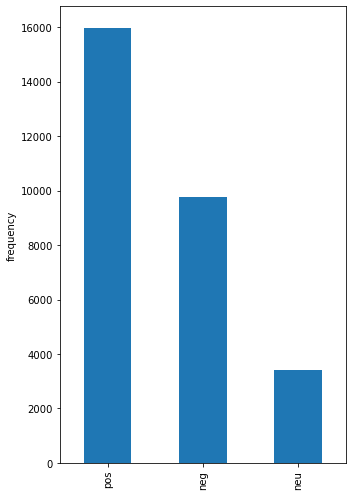

In [41]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [5, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

#df = pd.DataFrame({'numbers': [2, 4, 1, 4, 3, 2, 1, 3, 2, 4]})
df_nlp['pos_neu_neg_review_score'].value_counts().plot(ax=ax, kind='bar', ylabel='frequency')

plt.show()

In [42]:
df_nlp = pd.get_dummies(df_nlp,columns= ['pos_neu_neg_review_score'])

In [43]:
df_nlp.head(5)

,airline_name,author_country,date,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,value_money_rating,recommended,has_wifi,has_entertainment,polarity,pos_neu_neg_review_score_neg,pos_neu_neg_review_score_neu,pos_neu_neg_review_score_pos
0,adria-airways,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,4.0,1,0,1,0.7351,0,0,1
1,adria-airways,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,5.0,1,0,1,0.8777,0,0,1
2,adria-airways,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,5.0,1,0,1,0.9497,0,0,1
3,adria-airways,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,4.0,1,0,1,0.9228,0,0,1
4,adria-airways,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,0,0,1,0.8184,1,0,0


In [44]:
# Stop words.
# Airlines appearing in the dataset. This is the official name of the airlines. These words should be removed from the review text.
airlines_lower = df_nlp['airline_name'].str.lower().unique().tolist()
# Words appearing in the official name of the airlines. These words should be removed from the review text.
airlines_identifier = ['airlines',
                       'air lines',
                       'airline',
                       'air line',
                       'airways',
                       'air']
# In addition to the official name of the airlines, customers can use shortened versions of this name.
airlines_informal_lower = []
for airline in airlines_lower:
    found = False
    for airline_identifier in airlines_identifier:
        if found == False:
            if str(' '+airline_identifier) in airline:
                airline_informal = airline.replace(str(' '+airline_identifier),'')
                airlines_informal_lower.append(airline_informal)
                found = True
# Other stop words.
additional_stopwords = ['one','get','also','however','even','make', 'flight','available', 'wizzair', 'lpl', 'lju', 'fra', 'zrh']

nltk_stopwords = stopwords.words('english')
all_stopwords = nltk_stopwords + airlines_lower + airlines_identifier + airlines_informal_lower + additional_stopwords

In [45]:
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = all_stopwords
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_nlp["review_clean"] = df_nlp["content"].apply(lambda x: clean_text(x))

In [46]:
positive_reviews = df_nlp[df_nlp['recommended']==1]
negative_reviews = df_nlp[df_nlp['recommended']==0]

In [47]:
positive_reviews.head()

,airline_name,author_country,date,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,value_money_rating,recommended,has_wifi,has_entertainment,polarity,pos_neu_neg_review_score_neg,pos_neu_neg_review_score_neu,pos_neu_neg_review_score_pos,review_clean
0,adria-airways,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,4.0,1,0,1,0.7351,0,0,1,outbound fra/prn hour min thought drinks/snack...
1,adria-airways,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,5.0,1,0,1,0.8777,0,0,1,two short hop zrh-lju lju-vie fast crj seat co...
2,adria-airways,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,5.0,1,0,1,0.9497,0,0,1,flew zurich-ljubljana newish almost full depar...
3,adria-airways,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,4.0,1,0,1,0.9228,0,0,1,adria serve min ljubljana amsterdam brand new ...
5,adria-airways,Germany,2014-06-08,Sarajevo-Frankfurt via Ljubljana. I loved flyi...,Economy,9.0,4.0,4.0,3.0,4.0,1,0,1,0.8827,0,0,1,sarajevo-frankfurt via ljubljana love fly smal...


In [48]:
df_nlp.iloc[4]

airline_name                                                        adria-airways
author_country                                                             Poland
date                                                                   2014-06-16
content                         WAW-SKJ Economy. No free snacks or drinks on t...
cabin_flown                                                               Economy
overall_rating                                                                  4
seat_comfort_rating                                                             4
cabin_staff_rating                                                              2
food_beverages_rating                                                           1
value_money_rating                                                              2
recommended                                                                     0
has_wifi                                                                        0
has_entertainmen

In [48]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        stopwords = all_stopwords,
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(positive_reviews['review_clean'])

NameError: name 'WordCloud' is not defined

In [ ]:
show_wordcloud(negative_reviews['review_clean'])

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df_nlp["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_nlp.index
df_nlp = pd.concat([df_nlp, tfidf_df], axis=1)

In [49]:
df_nlp.columns[17]

'review_clean'

In [50]:
corr_values = df_nlp[['polarity','recommended']].dropna(axis=0,how='any').corr()

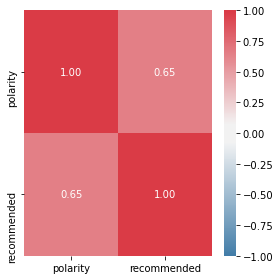

In [51]:
def plot_cmap(matrix_values, figsize_w, figsize_h, filename):
    if figsize_w is not None and figsize_h is not None:
        plt.figure(figsize=(figsize_w,figsize_h))
    else:
        plt.figure()
    cmap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
    sns.heatmap(matrix_values, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1)
    plt.savefig(filename)
    plt.show()
    return cmap

plot_cmap(matrix_values=corr_values, 
          figsize_w=4, 
          figsize_h=4,
          filename='./Corr1.png')

In [100]:
X = df_nlp.iloc[:,[6,7,8,9,13,14,15,16]]
Y = df_nlp.iloc[:,10]

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


In [102]:
X_train

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,value_money_rating,polarity,pos_neu_neg_review_score_neg,pos_neu_neg_review_score_neu,pos_neu_neg_review_score_pos
37205,1.0,1.0,1.0,2.0,-0.4497,1,0,0
40222,1.0,1.0,2.0,2.0,-0.5611,1,0,0
30756,4.0,5.0,4.0,5.0,-0.5145,0,0,1
14273,5.0,5.0,4.0,5.0,0.8847,0,0,1
28798,5.0,5.0,5.0,5.0,0.9368,0,0,1
...,...,...,...,...,...,...,...,...
30575,2.0,4.0,2.0,1.0,-0.7143,1,0,0
7273,5.0,5.0,5.0,4.0,0.9643,0,0,1
1263,4.0,5.0,5.0,5.0,0.9957,0,0,1
22328,4.0,4.0,3.0,3.0,0.9067,0,0,1


In [103]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,Y_train)

LinearRegression()

In [104]:
LR.predict(X_test)
LR.score(X_test, Y_test)

0.823584460477322

In [105]:
import statsmodels.api as sm    
X_train1 = sm.add_constant(X_train)
lm_1 = sm.OLS(Y_train,X_train1)
lm_2 = lm_1.fit()
lm_2.summary()
#LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            recommended   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.356e+04
Date:                Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:53:18   Log-Likelihood:                 3330.2
No. Observations:               20405   AIC:                            -6644.
Df Residuals:                   20397   BIC:                            -6581.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2316      0.005     44.572      0.000       0.221       0.242
seat_comfort_rating              0.0076      0.002      4.792      0.000       0.005       0.011
cabin_staff_rating               0.0134      0.002      8.269      0.000       0.010       0.017
food_beverages_rating            0.0027      0.001      2.128      0.033       0.000       0.005
value_money_rating               0.0329      0.002     17.692      0.000       0.029       0.037
polarity                         0.0472      0.003     17.093      0.000       0.042       0.053
pos_neu_neg_review_score_neg    -0.3025      0.003   -115.930      0.000      -0.308      -0.297
pos_neu_neg_review_score_neu     0.0601      0.004     16.425      0.000       0.053       0.067
pos_neu_neg_review_score_pos     0.4740      0.005    102.644      0.000       0.465       0.483
==============================================================================
Omnibus:                     2932.380   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37014.058
Skew:                           0.244   Prob(JB):                         0.00
Kurtosis:                       9.580   Cond. No.                     1.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [107]:
Y_pred = clf.predict(X_test)
clf.score(X_test, Y_test)

0.9431740224102447

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[3256  147]
 [ 350 4993]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3403
           1       0.97      0.93      0.95      5343

    accuracy                           0.94      8746
   macro avg       0.94      0.95      0.94      8746
weighted avg       0.94      0.94      0.94      8746



In [109]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, Y_train)

In [110]:
y_pred = clf_dt.predict(X_test)

In [111]:
clf_dt.score(X_test,Y_test)

0.9227075234392865

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[3080  323]
 [ 353 4990]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3403
           1       0.94      0.93      0.94      5343

    accuracy                           0.92      8746
   macro avg       0.92      0.92      0.92      8746
weighted avg       0.92      0.92      0.92      8746



In [122]:
X1 = df_nlp.iloc[:,[6,7,8,12]]
Y1 = df_nlp.iloc[:,9]

In [123]:
X2 = df_nlp.iloc[:,[6,7,8,12]]
Y2 = df_nlp.iloc[:,5]

In [124]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.30, random_state=42)

In [127]:
X1

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,has_entertainment
0,4.0,4.0,4.0,1
1,4.0,5.0,4.0,1
2,5.0,5.0,4.0,1
3,4.0,4.0,3.0,1
4,4.0,2.0,1.0,1
...,...,...,...,...
41207,3.0,3.0,0.0,1
41210,1.0,3.0,3.0,1
41213,2.0,1.0,0.0,1
41216,3.0,4.0,2.0,1


In [128]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.30, random_state=42)

In [129]:
X_train2

,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,has_entertainment
37205,1.0,1.0,1.0,1
40222,1.0,1.0,2.0,1
30756,4.0,5.0,4.0,0
14273,5.0,5.0,4.0,0
28798,5.0,5.0,5.0,1
...,...,...,...,...
30575,2.0,4.0,2.0,1
7273,5.0,5.0,5.0,1
1263,4.0,5.0,5.0,1
22328,4.0,4.0,3.0,1


In [130]:
X_train1 = sm.add_constant(X_train1)
lm_1 = sm.OLS(Y_train1,X_train1)
lm_2 = lm_1.fit()
lm_2.summary()
#LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     value_money_rating   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     8973.
Date:                Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:55:38   Log-Likelihood:                -26061.
No. Observations:               20405   AIC:                         5.213e+04
Df Residuals:                   20400   BIC:                         5.217e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5904      0.029     20.091      0.000       0.533       0.648
seat_comfort_rating       0.4233      0.006     71.852      0.000       0.412       0.435
cabin_staff_rating        0.3773      0.006     64.443      0.000       0.366       0.389
food_beverages_rating     0.1336      0.005     25.149      0.000       0.123       0.144
has_entertainment        -0.2876      0.025    -11.435      0.000      -0.337      -0.238
==============================================================================
Omnibus:                      511.271   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.039
Skew:                          -0.176   Prob(JB):                    3.81e-216
Kurtosis:                       4.021   Cond. No.                         37.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
X_train2 = sm.add_constant(X_train2)
lm_1 = sm.OLS(Y_train2,X_train2)
lm_2 = lm_1.fit()
lm_2.summary()
#LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 1.244e+04
Date:                Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:55:40   Log-Likelihood:                -40247.
No. Observations:               20405   AIC:                         8.050e+04
Df Residuals:                   20400   BIC:                         8.054e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7181      0.059    -12.193      0.000      -0.834      -0.603
seat_comfort_rating       0.8442      0.012     71.494      0.000       0.821       0.867
cabin_staff_rating        1.0337      0.012     88.092      0.000       1.011       1.057
food_beverages_rating     0.3089      0.011     29.012      0.000       0.288       0.330
has_entertainment        -0.5383      0.050    -10.679      0.000      -0.637      -0.440
==============================================================================
Omnibus:                     2516.069   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21305.797
Skew:                           0.296   Prob(JB):                         0.00
Kurtosis:                       7.971   Cond. No.                         37.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""